In [119]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import functions_gradient_circles as fgc
import movies_from_plots as mfp

In [140]:
import importlib

In [146]:
importlib.reload(mfp)

<module 'movies_from_plots' from 'C:\\Users\\Rafael\\Documents\\Independent Research\\movies_from_plots.py'>

# Example using mathematically defined parametric curve

In [123]:
a = 2
b = 1

t = 2*np.pi*np.arange(0,101)/100

x = a*np.cos(t)#(a-b)*np.cos(2*t) + b*np.cos(2*t*(a/b-1))
y = b*np.sin(t)#(a-b)*np.sin(2*t) - b*np.sin(2*t*(a/b-1))

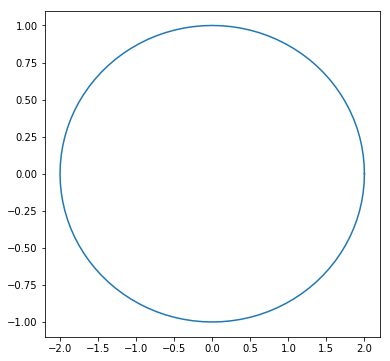

In [124]:
plt.figure(figsize=(6,6))
plt.plot(x,y)

# Length of generated curve

In [125]:
dt = (t[1]-t[0])
def Length(x,y,dt):
    dx = np.diff(x)/dt
    dy = np.diff(y)/dt
    s = (dx**2+dy**2)**0.5
    return np.sum(s*dt)

L = Length(x,y,dt)

# Making a circle with same length

In [126]:
r = L/(2*np.pi)
T = np.sum(t)
f = 1

Cx = r*np.cos(f*t)
Cy = r*np.sin(f*t)

In [127]:
x_mean = np.mean(x)
y_mean = np.mean(y)

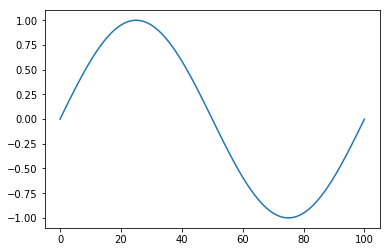

In [128]:
plt.plot(y)

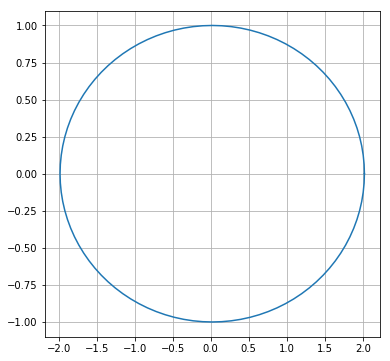

In [129]:
plt.figure(figsize=(6,6))
plt.plot(x+x_mean,y+y_mean)
#plt.plot(x_mean,y_mean,'*')
#plt.plot(Cx,Cy)
plt.grid()

# Gradient descent

In [130]:
N = 5000 #max number of iterations
mu = 0.005 #learning rate
prec_r = 0.03 #precision

g = np.array([x,y])
C = np.array([Cy,Cx])

g_1 = np.zeros(g.shape)
g_0 = g_1


#new versions

g, g_list,c_list = fgc.Gradient_Descent(g,dt,N,prec_r,mu)

Total number of steps: 5000
Maximum curvature difference: 0.10994600294850698
Ratio of total length: 2.6042157619579362


In [131]:
dk_array = np.array(c_list)
g_array = np.array(g_list)

In [132]:
dk_array.shape

(5000, 101)

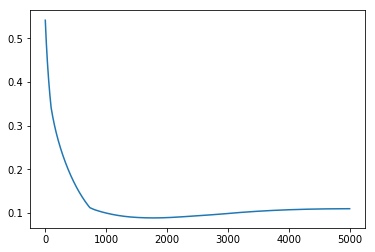

In [133]:
plt.plot(np.max(np.abs(dk_array),1))

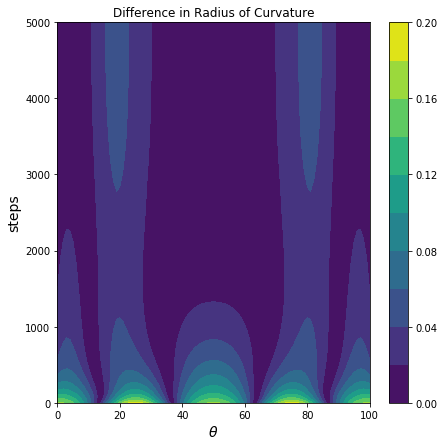

In [134]:
plt.figure(figsize=(7,7))
plt.contourf(np.log10(np.abs(dk_array)+1),10)
plt.xlabel('$\\theta$',fontsize=14)
plt.ylabel('steps',fontsize=14)
plt.title('Difference in Radius of Curvature')
plt.colorbar()

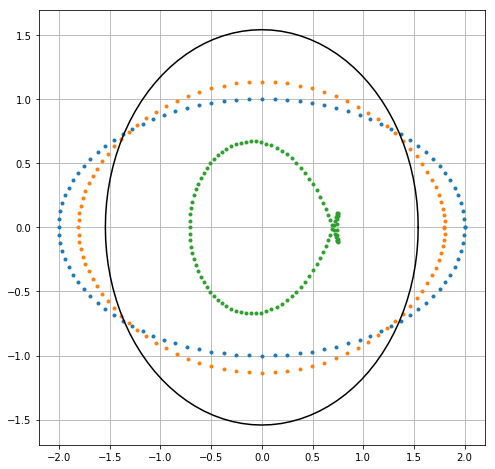

In [135]:
plt.figure(figsize=(8,8))
g = np.array([x,y])
plt.plot(g[0],g[1],'.')
plt.plot(g_array[100,0],g_array[100,1],'.')
plt.plot(1.25*g_list[-1][0],1.25*g_list[-1][1],'.')
plt.plot(Cx,Cy,'k')
#plt.xlim(-2,2)
plt.grid()

Text(0.5, 1.0, 'A')

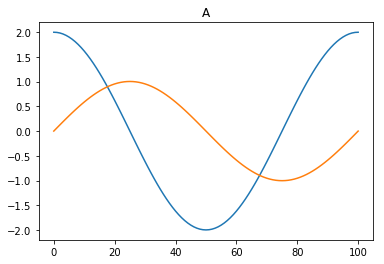

In [136]:
plt.plot(g_array[1,:].T)
plt.title('A')

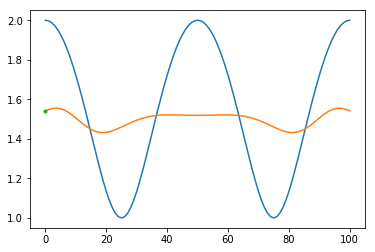

In [137]:
plt.plot((dk_array.T)[:,0]+L/(2*np.pi))
plt.plot((dk_array.T)[:,-1]+L/(2*np.pi))
plt.plot(L/(2*np.pi),'.')


# Movie making

In [138]:
file_path = 'C:\\Users\\Rafael\\Documents\\Independent Research\\ProjectCircles\\'

In [147]:
N_initial = 0
N_final = 400
frame_step = 4
dt = (t[1]-t[0])

mfp.makemovie(g_array,dt)

Starting frame: 0
Stopping frame: 400
Frame step: 4
Image File Path: C:\\Users\\Rafael\\Documents\\Independent Research\\ProjectCircles\\
Video file name (with .mp4 included): ellipse2_1.mp4
